# Real Madrid Maç Tahmin Projesi



Bu proje, Real Madrid futbol takımının maç sonuçlarını tahmin etmek ve maç istatistiklerini görselleştirmek amacıyla oluşturulmuştur.

## Veri Toplama ve İşleme

### Web Scraping ve Veri Ön İşleme
Bu bölümde, [Sky Sports](https://www.skysports.com/real-madrid-results/2023-24) web sitesinden Real Madrid maç sonuçlarını çekme ve işleme işlemleri yapılmıştır.

- `scrape_and_preprocess_matches()` fonksiyonu, belirli bir tarih aralığındaki maç verilerini çeker ve işler.
- Çekilen veriler, 'processed_matches.csv' dosyasına kaydedilir.

## Model Eğitimi ve Değerlendirmesi

Bu kısımda, çekilen maç verileri üzerinden farklı makine öğrenimi modelleri eğitilmiş ve performansları değerlendirilmiştir.

- Eğitilen modeller arasında Random Forest, Gradient Boosting gibi çeşitli regrasiyon veya sınıflandırma algoritmaları bulunmaktadır.
- model, 'model.pkl' dosyasına kaydedilmiştir.

## Streamlit Uygulaması

Bu bölümde, kullanıcı arayüzü oluşturulmuş Real Madrid maç tahminleri yapılmıştır.

- Kullanıcı, bir takım adını seçerek Real Madrid'ın o takıma karşı kazanma kayıbetme veya berabere kalma olasılıklarını görebilir.
- Tahmin sonuçları ve maç istatistikleri görsel olarak sunulmuştur.

[matchresultguess](https://matchresultguess.streamlit.app/) sitesinde modelin gerçek dünyada çalışmasını takip edebilriz


# Veri Toplama

In [72]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime

def scrape_and_preprocess_matches():
    # Maç verilerinin toplanacağı boş bir liste oluşturulur.
    all_match_data = []

    # Şu anki yıl alınır
    current_year = datetime.now().year

    # Yılları tersten (en son yıldan ilk yıla doğru) dolaşır.
    for year in range(current_year, 1999, -1):  
        # Yıl aralığını string formatında oluşturur (örneğin, '2023-2024')
        year_str = f'{year}-{year+1:02d}'
        
        # Skysports sitesinden Real Madrid'in maç sonuçlarının bulunduğu sayfayı çeker.
        url = f'https://www.skysports.com/real-madrid-results/{year_str}'
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Her bir maçın yer aldığı HTML bloklarını bulur.
        matches = soup.find_all('div', class_='fixres__item')

        # Her bir maçın verilerini işler.
        match_data = []
        for match in matches:
            # Takımların isimlerini bulur.
            teams = match.find_all('span', class_='swap-text__target')
            team_A = teams[0].text
            team_B = teams[1].text

            # Maç skorlarını bulur.
            scores = match.find('span', class_='matches__teamscores').text.strip()
            score_split = scores.split()
            score_A = score_split[0].strip()
            score_B = score_split[-1].strip()

            # Maç verilerini bir sözlükte toplar ve maç veri listesine ekler.
            match_data.append({
                'match_year': year_str,
                'team_A': team_A if 'Real Madrid' in team_A else team_B,
                'score_A': score_A if 'Real Madrid' in team_A else score_B,
                'team_B': team_B if 'Real Madrid' in team_A else team_A,
                'score_B': score_B if 'Real Madrid' in team_A else score_A,
            })

        # Oluşturulan maç veri listesi genel maç veri listesine eklenir.
        all_match_data.extend(match_data)

    # Toplanan tüm maç verileri bir DataFrame'e dönüştürülür.
    df = pd.DataFrame(all_match_data)
    
    # Gerekli sütunlar seçilerek bir CSV dosyasına kaydedilir.
    df[['match_year', 'team_A', 'team_B', 'score_A', 'score_B']].to_csv('processed_matches.csv', index=False)
    print('processed_matches.csv dosyası oluşturuldu.')

# Fonksiyon çağrılır.
scrape_and_preprocess_matches()


processed_matches.csv dosyası oluşturuldu.


In [1]:
import pandas as pd

# Dosyayı oku
file_path = "processed_matches.csv"  # Dosyanın gerçek adını kullanmalısın
df = pd.read_csv(file_path)

# 'result' sütununu ekleyerek veriyi güncelle
df['result'] = df.apply(lambda row: 1 if row['score_A'] > row['score_B'] else
                                    0 if row['score_A'] < row['score_B'] else
                                    2 if row['score_A'] == row['score_B'] else
                                    None, axis=1)

# Güncellenmiş veriyi aynı dosyaya yaz
df.to_csv(file_path, index=False)


# ön işleme ve normalleştirme

In [2]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder


veriyi okuma ve sayısallaştırma

In [3]:

# Load the dataset
file_path = "processed_matches.csv"
df = pd.read_csv(file_path)

In [4]:
# Birden fazla sütunu kaldırma
not_imp_col = ['match_year', 'team_A', 'score_A', 'score_B']
df = df.drop(columns=not_imp_col)


In [5]:
df.dropna(inplace=True)

In [6]:
def kategorik_kodlama(df, kategorik_sutunlar):
    return pd.get_dummies(df, columns=kategorik_sutunlar)
kategorik_kodlama(df, ['team_B', 'result'])


,team_B_1. FC Union Berlin,team_B_AC Milan,team_B_AEK Athens (Grk),team_B_Ajax,team_B_Al Ahly,team_B_Al Ain,team_B_Al Ittihad,team_B_Al Jazira,team_B_Al-Hilal,team_B_Alaves,...,team_B_Valerenga,team_B_Villarreal,team_B_Werder Bremen,team_B_Wisla Krakow,team_B_Wolfsburg,team_B_Xerez,team_B_Zenit St. Petersburg,result_0,result_1,result_2
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1289,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1290,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1291,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [8]:
# "team_B" sütununu Label Encoding yap
label_encoder = LabelEncoder()
df['team_B_encoded'] = label_encoder.fit_transform(df['team_B'])
print(df['team_B_encoded'] )

0         9
1       137
2         0
3       107
4        63
       ... 
1288    108
1289    110
1290    119
1291     23
1292     42
Name: team_B_encoded, Length: 1293, dtype: int32


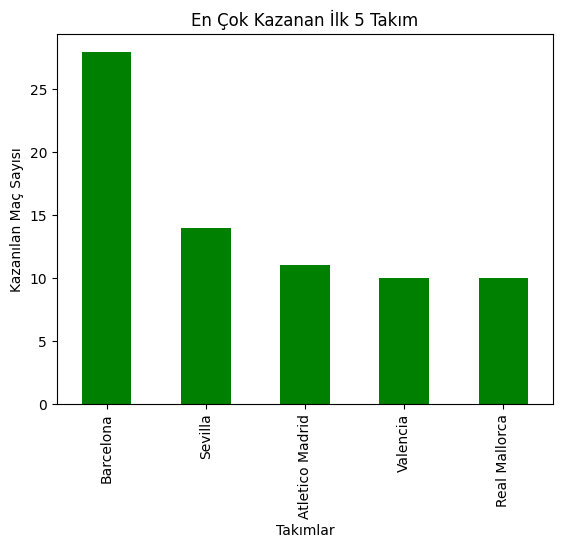

In [9]:
import matplotlib.pyplot as plt

# 'result' sütununda 'kazandı' olanları filtreleyip, kazanan takımları sayma
kazananlar = df[df['result'] == 0]['team_B'].value_counts()

# En çok kazanan ilk 5 takımın seçilmesi
en_cok_kazananlar = kazananlar.head(5)

# En çok kazanan takımların sayısını çubuk grafik olarak çizdirme
en_cok_kazananlar.plot(kind='bar', color='green')
plt.xlabel('Takımlar')
plt.ylabel('Kazanılan Maç Sayısı')
plt.title('En Çok Kazanan İlk 5 Takım')
plt.show()


In [10]:
# Sınıflandırma sütununun istatistiklerini gösterme
df['team_B'].describe()


count          1293
unique          143
top       Barcelona
freq             69
Name: team_B, dtype: object

In [11]:
df.isnull().sum()

team_B            0
result            0
team_B_encoded    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   team_B          1293 non-null   object
 1   result          1293 non-null   int64 
 2   team_B_encoded  1293 non-null   int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 25.4+ KB


In [13]:
# Örnek bir DataFrame'den ilk birkaç satırı görüntüleme
print(df.head(20))


                team_B  result  team_B_encoded
0               Alaves       1               9
1           Villarreal       1             137
2   1. FC Union Berlin       1               0
3           Real Betis       2             107
4              Granada       1              63
5               Napoli       1              92
6                Cadiz       1              33
7             Valencia       1             135
8                Braga       1              30
9       Rayo Vallecano       2             106
10           Barcelona       1              23
11               Braga       1              30
12             Sevilla       2             124
13             Osasuna       1              96
14              Napoli       1              92
15              Girona       1              62
16          Las Palmas       1              71
17     Atletico Madrid       0              20
18  1. FC Union Berlin       1               0
19       Real Sociedad       1             110


# Eğitm

### kütüphaneleri import etme

In [14]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


### değikenleri ayırma ve veriseti eğitim ve test için oluşturma

In [15]:

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayırma
X = df[['team_B_encoded']]
y = df['result']

# Eğitim ve test veri setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)


### eğitim algoritmaları bir list te yerleştirme

In [16]:

# Define algorithms
algorithms = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB()
]


### train ve predict ve test adımları başlatma

In [17]:

print("----RMSE----")
# Train and evaluate each algorithm
for algorithm in algorithms:
    model = algorithm
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{algorithm.__class__.__name__} RMSE: {rmse}")


----RMSE----
LinearRegression RMSE: 0.5692587112484733
Ridge RMSE: 0.5692587114927085
Lasso RMSE: 0.5697080110865227
ElasticNet RMSE: 0.5697080110865227
DecisionTreeRegressor RMSE: 0.5821490015156677
RandomForestRegressor RMSE: 0.5765436875157224
GradientBoostingRegressor RMSE: 0.5640834328364998
SVR RMSE: 0.5659942628375894
KNeighborsRegressor RMSE: 0.6098293957262899
RandomForestClassifier RMSE: 0.6119782467681139
DecisionTreeClassifier RMSE: 0.6275527020278009
LogisticRegression RMSE: 0.5694947974514994
KNeighborsClassifier RMSE: 0.7246354428928556
SVC RMSE: 0.5694947974514994
GaussianNB RMSE: 0.5694947974514994


###### Tüm algoritmaların aralarında yakın sonuçlar verdiği için, RandomForestClassifier algoritmasını tercih etmemin temel nedeni, predict_proba fonksiyonundan faydalanmaktır. Bu fonksiyon, sınıflandırma problemlerinde tahmin edilen sınıfların olasılıklarını sağlar. RandomForestClassifier'ın bu özelliği, modelin sınıflandırma gücünü daha ayrıntılı ve detaylı bir şekilde değerlendirmeme olanak tanır. Bu sayede, modelin sınıflandırma kararlarını daha iyi anlayabilir ve güvenilir tahminler elde edebilirim.

In [18]:
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

# Eğitilen modeli kaydedelim
joblib.dump(model, 'model.pkl')
print("RandomForestClassifier ile eğitilen model kaydedildi.")

RandomForestClassifier ile eğitilen model kaydedildi.


# Servisleme

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import math
import joblib
import streamlit as st
import matplotlib.pyplot as plt

# Veri setini oku
file_path = "processed_matches.csv"
df = pd.read_csv(file_path)

# "team_B" sütununu Label Encoding yap
label_encoder = LabelEncoder()
df['team_B_encoded'] = label_encoder.fit_transform(df['team_B'])

# Load the trained model
best_model = joblib.load('model.pkl')

# Streamlit arayüzü
st.title("Real Madrid Win Prediction Model")

# Kullanıcıdan takım seçimini al
selected_team = st.selectbox("Select a team:", df['team_B'].unique())

# Label Encoding uygula
selected_team_encoded = label_encoder.transform([selected_team])

# Tahmin olasılıklarını al
probabilities = best_model.predict_proba([[selected_team_encoded[0]]])[0]

# Olasılıkları göster
st.write(f"{selected_team} Team Next Match Probabiliteis:")
st.write(f"Probability of Real Madrid winning: {probabilities[1]:.2%}")
st.write(f"Draw Probability: {probabilities[2]:.2%}")
st.write(f"Probability of {selected_team} winning: {probabilities[0]:.2%}")

# Maç istatistikleri
team_A_wins = len(df[(df['team_B'] == selected_team) & (df['score_A'] > df['score_B'])])
team_B_wins = len(df[(df['team_B'] == selected_team) & (df['score_A'] < df['score_B'])])
draws = len(df[(df['team_B'] == selected_team) & (df['score_A'] == df['score_B'])])

# Maç istatistikleri
st.subheader("Match Statistics")
st.write(f"Real Madrid Wins: {team_A_wins} times")
st.write(f"{selected_team} Wins: {team_B_wins} times")
st.write(f"Draws: {draws} times")

# Sidebar menü
st.sidebar.header('Graph Menu')
st.sidebar.title('Statistics Chart')

# Calculate the maximum probability for the selected team's future match outcome
prediction_probability = max(probabilities)

# Sidebar'da çubuk grafik gösterimi
with st.sidebar.expander('Match Statistics'):
    fig, ax = plt.subplots()
    labels = ['Real Madrid Wins', f'{selected_team} Wins', 'Draws']
    values = [team_A_wins, team_B_wins, draws]

    ax.bar(labels, values)
    ax.set_ylabel('Number of Occurrences')
    ax.set_title('Match Statistics')

    st.pyplot(fig)

# Sidebar menü
st.sidebar.title('Prediction Chart')

# Sidebar'da pasta grafiği gösterimi
with st.sidebar.expander('Match Prediction'):
    labels = ['Real Madrid Wins', f'{selected_team} Wins', 'Draws']
    sizes = [probabilities[1], probabilities[0], probabilities[2]]
    colors = ['lightcoral', 'lightskyblue', 'lightgreen']
    explode = (0.1, 0, 0.1)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    ax.axis('equal')
    ax.set_title('Match Prediction')

    st.pyplot(fig)


ModuleNotFoundError: ignored